# Classification with Logistic Regression
Logistic regression is a statistical method used for binary classification, predicting the probability of an event occurring. It models the relationship between independent variables and a binary dependent variable using a sigmoid function. It finds applications in spam detection, credit scoring, medical diagnosis, risk assessment, social sciences, epidemiology, and healthcare.

### Sigmoid function:
$ \sigma(z) = \frac{1}{1 + e^{-z}} $ <br>
where $ z $ is linear regression function $ z = \vec{w} * \vec{x} + b $, there the sigmoid function for logistic regression is: <br>
#### $ f_{(\vec{w}, b)}(\vec{x}) = \frac{1}{1 + e^{-(\vec{w} * \vec{x} + b)}} $



#### Visualization of sigmoid function

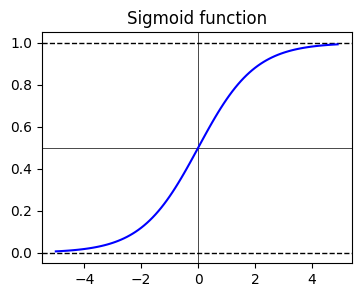

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5,5,0.1)
z = 1 / (1 + np.exp(-x))

fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(y=0, color="black", linestyle="--", linewidth=1); ax.axhline(y=1, color="black", linestyle="--", linewidth=1)
ax.axhline(y=0.5, color="black", linestyle="-", linewidth=0.5);  ax.axvline(x=0, color="black", linestyle="-", linewidth=0.5)
ax.plot(x, z, 'b-'); ax.set(title='Sigmoid function')
plt.show()

## Cost function

In contrast to linear regression, the squared error cost function for logistic regression is NOT suitable. The squared error cost function for linear regression is convex (has a "U" shape), however for logistic regression is non-convex and gradient descent can easily stuck on local minima. 

The general cost function is as follows, where $ L $ is the loss function for one sample.
$$
J(\vec{w}, b) = \frac{1}{m}*\sum_{i=1}^{m}L(f_{\vec{w}, b}(\vec{x}^{(i)}),y^{(i)}) \, 
$$
where the loss function for logistic regression is defined:
$$
\begin{equation}
  L(f_{(\vec{w}, b)}(\vec{x}^{(i)}),y^{(i)}) =
  \begin{cases}
    -\log(f_{\vec{w}, b}(\vec{x}^{(i)})) & \text{if $y^{(i)} = 1$} \\
    -\log(1 - f_{\vec{w}, b}(\vec{x}^{(i)})) & \text{if $y^{(i)} = 0$}
  \end{cases}
\end{equation}
$$
we can rewrite this equation into one line formula:
$$
L(f_{(\vec{w}, b)}(\vec{x}^{(i)}),y^{(i)}) =-y^{(i)}*\log(f_{\vec{w}, b}(\vec{x}^{(i)}))-(1-y^{(i)})*\log(1 - f_{\vec{w}, b}(\vec{x}^{(i)}))
$$
Based on the value of $y$, the "correct part" of the formula will remain, and the "wrong part" of the formula will be equal to 0.

From this simplified loss function we can derive the cost function for logistic regression:
$$
J(\vec{w}, b) = -\frac{1}{m}*\sum_{i=1}^{m}[y^{(i)}*\log(f_{\vec{w}, b}(\vec{x}^{(i)}))+(1-y^{(i)})*\log(1 - f_{\vec{w}, b}(\vec{x}^{(i)}))] \, 
$$
The cost function is derived from the Maximum Likelihood Estimation (MLE)

#### Visualization of loss function for logistic regression

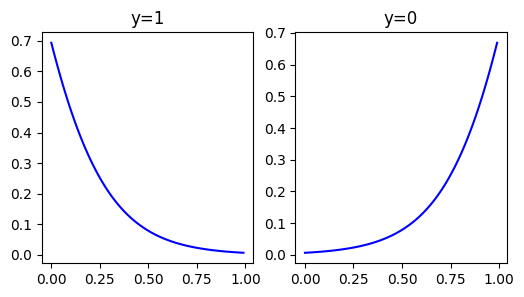

In [69]:
x = np.arange(0, 1, 0.01)
x = 5*x   #for better illustration

def get_y_1(x):
    sig = 1 / (1 + np.exp(-x))
    y_0 = -np.log(sig)
    return y_0

def get_y_0(x):
    sig = 1 / (1 + np.exp(-(-5+x))); log_arg = 1 - sig
    y_1 = -np.log(log_arg)
    return y_1

y_0 = get_y_0(x)
y_1 = get_y_1(x)

fix, axs = plt.subplots(1, 2, figsize=(6,3))
axs[0].plot(x/5, y_1, 'b')
axs[0].set(title='y=1')
axs[1].plot(x/5, y_0, 'b')
axs[1].set(title='y=0')
plt.show()


## Gradient descent
Gradient descent is the derivative of the cost function. The formula might seem similar to linear regression, the difference is in $ f_{\vec{w},b}(\vec{x}) = \frac{1}{1 + e^{-(\vec{w} * \vec{x} + b)}} $<br>
<br>
$ w_{j} = w_{j} - \alpha * \frac{\partial}{\partial w_{j}} J(\vec{w}, b) $ ,where we have partial derivative by $ w_{j} $ <br>
$ w_{j} = w_{j} - \alpha * \frac{1}{m}*\sum_{i=1}^{m}(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})*x_{j}^{(i)} \, $ <br>
<br>
b is a number, therefore: <br>
$ b = b - \alpha * \frac{1}{m}*\sum_{i=1}^{m}(f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)}) $


#### Let's see a practical example
We have datasets of two features (points from 2 exams) and target whether the student was admitted

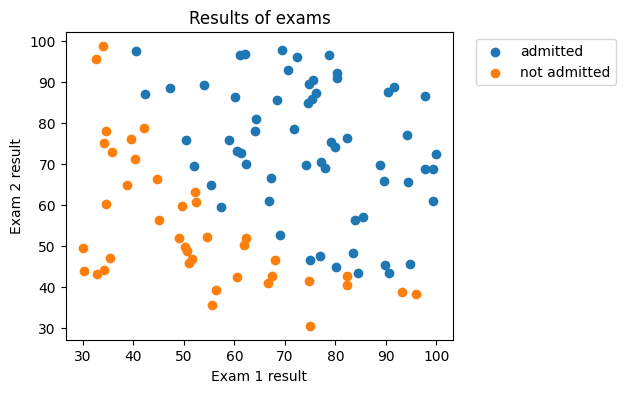

In [95]:
import pandas as pd
colnames=['exam1', 'exam2', 'admitted'] 
data = pd.read_csv('./data/marks.txt', names=colnames, header=None)

data_admitted = data[data['admitted']==1]
data_not_admitted = data[data['admitted']==0]

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(data_admitted.exam1, data_admitted.exam2, label='admitted')
ax.scatter(data_not_admitted.exam1, data_not_admitted.exam2, label='not admitted')
ax.legend(loc='upper left', bbox_to_anchor=(1.04, 1), fancybox=True, ncol=1)
ax.set(title="Results of exams", ylabel = 'Exam 2 result', xlabel = 'Exam 1 result')
plt.show()

In [217]:
#calculation of gradient (a derivative of cost function J(w,b))
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

def f_x_f(x, w, b):
    return np.dot(x, w) + b

def err_f(sig, y):
    return sig - y

def calc_gradient(x, y, w, b):
    m, n = x.shape
    de_w = np.zeros((n,))
    de_b = 0
    
    for i in range(m):
        x_i = X.iloc[i].to_numpy()  #convert pandas row to numpy vector
        f_x = np.dot(x_i, w) + b    #calculate f(x)
        err = (1 / (1 + np.exp(-f_x))) - y.iloc[i]
        for j in range(n):
            de_w[j] += err*x_i[j]     #update weights
        de_b += err     # update bias

    de_w = de_w / m
    de_b = de_b / m
    
    return de_w, de_b

# let's implement a vectorized algorithm to speed up the process and 
# possibility to fine-tune the model with different values of alpha 
def calc_gradient_vector(x, y, w, b):
    m, n = x.shape
    
    err = err_f(sigmoid(f_x_f(x, w, b)), y)
    de_w = 1/m*np.dot(x.T, err)
    de_b = 1/m*np.sum(err)

    return de_w, de_b
    

#updating w, b value to the local minima
def gradient_descent(x, y, w_in, b_in, alpha, num_iter):
    for i in range(num_iter):
        # de_w, de_b = calc_gradient(x, y, w_in, b_in)  # uncomment for non vectorized 
        de_w, de_b = calc_gradient_vector(x, y, w_in, b_in)  # get gradient
        w_in = w_in - alpha * de_w
        b_in = b_in - alpha * de_b
        
        if i % 30000 == 0:
            print(f'Iteration {i:4} | w : {w_in} | b : {b_in:8.4f}')
    return w_in, b_in

In [236]:
# prepare features and target
X = data.iloc[:,:-1]     # all columns except the last one
y = data.iloc[:,-1]      # only the last columns

# initialize parameters
w_init = np.zeros((X.shape[1],))
b_init = 0

num_iters = 300000
alpha = 0.003

np.set_printoptions(precision=5)  #numpy print only 5 decimal places

w_fin, b_fin = gradient_descent(X, y, w_init, b_init, alpha, num_iters)
print(f'(w,b) found by gradient descent: ({w_fin}, {b_fin:8.4f})')

Iteration    0 | w : [0.03603 0.03379] | b :   0.0003
Iteration 30000 | w : [0.1065  0.05169] | b :  -6.4741
Iteration 60000 | w : [0.06984 0.05959] | b : -10.5850
Iteration 90000 | w : [0.15153 0.13469] | b : -13.4311
Iteration 120000 | w : [0.15719 0.14362] | b : -15.5329
Iteration 150000 | w : [0.15567 0.14643] | b : -16.7589
Iteration 180000 | w : [0.15082 0.14446] | b : -17.3918
Iteration 210000 | w : [0.14689 0.14136] | b : -17.7330
Iteration 240000 | w : [0.14929 0.14378] | b : -18.0333
Iteration 270000 | w : [0.15154 0.14607] | b : -18.3158
(w,b) found by gradient descent: ([0.15367 0.14822], -18.5822)


In [260]:
# check accuracy
pred_y = np.where(sigmoid(f_x_f(X, w_fin, b_fin))>0.5,1,0)
accuracy = (pred_y==y).value_counts(normalize=True).mul(100).astype(str)+'%'
print(f'Our model accuracy is : {accuracy.values[0]}')
    

Our model accuracy is : 89.0%


#### Decision boundary
if we set a threshold to 0.5 then the decision boundary for two features is:
$$
    x_{1}*w_{1}+x_{2}*w_{2} + b = 0
$$

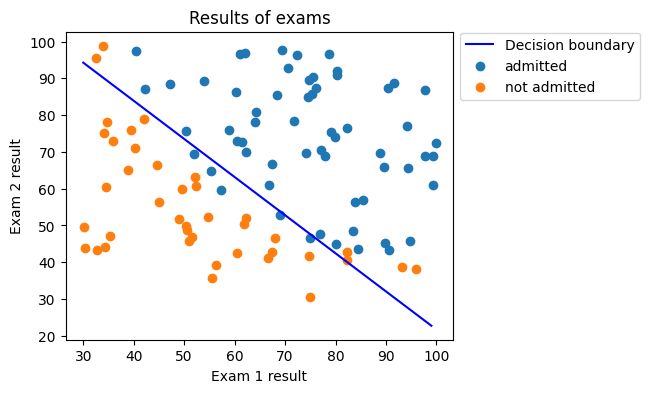

In [237]:
x_1 = np.arange(30, 100, 1)
x_2 = (- (b_fin + np.dot(w_fin[0], x_1))) / w_fin[1]

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x_1, x_2, 'b', label='Decision boundary')
ax.scatter(data_admitted.exam1, data_admitted.exam2, label='admitted')
ax.scatter(data_not_admitted.exam1, data_not_admitted.exam2, label='not admitted')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.02), fancybox=True, ncol=1)
ax.set(title="Results of exams", ylabel = 'Exam 2 result', xlabel = 'Exam 1 result')
plt.show()

#### Sci-kit learn comparison

As we can see our model does not perform ideally. After vectorization, the process is faster but still takes some time. Let's compare the result with the ski-kit learn library:

Model accuracy is 89.0%


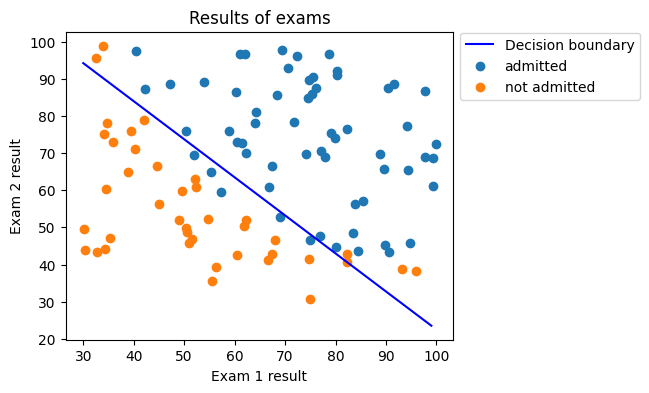

In [262]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X, y)

sk_w = lr_model.coef_
sk_b = lr_model.intercept_

x_1_sk = np.arange(30, 100, 1)
x_2_sk = (- (sk_b + np.dot(sk_w[0][0], x_1_sk))) / sk_w[0][1]

print(f"Model accuracy is {lr_model.score(X, y)*100}%")

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x_1_sk, x_2_sk, 'b', label='Decision boundary')
ax.scatter(data_admitted.exam1, data_admitted.exam2, label='admitted')
ax.scatter(data_not_admitted.exam1, data_not_admitted.exam2, label='not admitted')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.02), fancybox=True, ncol=1)
ax.set(title="Results of exams", ylabel = 'Exam 2 result', xlabel = 'Exam 1 result')
plt.show()

#### As we can see our model performs with the same accuracy than sci-kit learn, but sklearn is much faster

In [239]:
X_quad = X.copy()
X_quad['x1_2']=X_quad['exam1']**2
X_quad['x2_2']=X_quad['exam2']**2
features = []
for col in X_quad.columns:
    X_quad[col + '_s'] = (X_quad[col] - X_quad[col].mean()) / X_quad[col].std()
    features.append(col + '_s')

X_quad

,exam1,exam2,x1_2,x2_2,exam1_s,exam2_s,x1_2_s,x2_2_s
0,34.623660,78.024693,1198.797806,6087.852689,-1.594216,0.635141,-1.368217,0.543757
1,30.286711,43.894998,917.284849,1926.770808,-1.817101,-1.201489,-1.478733,-1.119159
2,35.847409,72.902198,1285.036716,5314.730477,-1.531325,0.359483,-1.334361,0.234790
3,60.182599,86.308552,3621.945269,7449.166165,-0.280687,1.080923,-0.416942,1.087787
4,79.032736,75.344376,6246.173368,5676.775061,0.688062,0.490905,0.613272,0.379476
...,...,...,...,...,...,...,...,...
95,83.489163,48.380286,6970.440296,2340.652054,0.917087,-0.960121,0.897604,-0.953757
96,42.261701,87.103851,1786.051355,7587.080849,-1.201681,1.123720,-1.137674,1.142902
97,99.315009,68.775409,9863.470974,4730.056948,1.730412,0.137407,2.033344,0.001134
98,55.340018,64.931938,3062.517544,4216.156573,-0.529558,-0.069422,-0.636561,-0.204239


In [243]:
lr_model_2 = LogisticRegression()
lr_model_2.fit(X_quad[features], y)

lr_model_3 = LogisticRegression()
lr_model_3.fit(X_quad.iloc[:,:4], y)

sk_w_2 = lr_model_2.coef_
sk_b_2 = lr_model_2.intercept_

print(lr_model.score(X, y))
print(lr_model_2.score(X_quad[features], y))
print(lr_model_3.score(X_quad.iloc[:,:4], y))

0.89
0.89
0.86
